## Logistic Regression
### from Carl Shan and Jen Selby

First, we import the scipy libraries utilized in this project

In [1]:
import numpy.random
from sklearn import linear_model
import matplotlib.pyplot

Next, we define the average heights & widths for each plant type.

In [2]:
NUM_INPUTS = 100
PLANT_A_AVG_HEIGHT = 60.0
PLANT_A_AVG_WIDTH = 8.0
PLANT_B_AVG_HEIGHT = 58.0
PLANT_B_AVG_WIDTH = 10.0
PLANT_C_AVG_HEIGHT = 56.0
PLANT_C_AVG_WIDTH = 5.0

We then generate data points around those assumed averages.

In [3]:
plantA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_INPUTS)
plantA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_INPUTS)

plantB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_INPUTS)
plantB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_INPUTS)

plantC_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_INPUTS)
plantC_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_INPUTS)

We then combine those generate inputs into a list and then print it out to assure it's acting as it should.

In [4]:
plant_heights = list(numpy.append(list(numpy.append(plantA_heights, plantB_heights)), plantC_heights))

In [5]:
plant_widths = list(numpy.append(list(numpy.append(plantA_widths, plantB_widths)), plantC_widths))

In [6]:
plant_inputs = list(zip(plant_heights, plant_widths))

In [7]:
plant_inputs

[(60.156470254990644, 7.2468019006646234),
 (61.371599364758815, 8.7376458322700135),
 (59.600052421681617, 7.964666305082944),
 (60.872386237224212, 7.3124735530996601),
 (59.848881021399087, 9.1404651884449972),
 (59.62973506090227, 7.7267941162416776),
 (59.375753611013131, 7.18023526124973),
 (61.300836949943616, 7.6734165613442089),
 (60.178640620278706, 8.3815225583453685),
 (60.222048652390924, 8.9199685086145717),
 (60.587250331481656, 8.1946083245689749),
 (58.721405300520665, 8.0086636433523939),
 (60.131103865943878, 7.8975512957751342),
 (60.461345656786143, 7.3006426151527934),
 (60.425471773445103, 9.4557100326883763),
 (61.983775582615507, 7.4552145397637668),
 (60.150001325474989, 6.7946362799340694),
 (61.19885788798652, 8.0403748420973411),
 (60.186755135672996, 8.2746500808462127),
 (61.32772058707863, 7.8384252666715897),
 (58.796766958629121, 8.7370703780862478),
 (60.599846311871545, 9.7465639415810479),
 (59.788573017700593, 8.6659020933076079),
 (59.535920357159

We then generate type arrays for each of our 3 logistic regression models, to define certain plants as 0 (for successfully in a group) and 1 (for not in the group). We then print out one of these arrays to be clear that the correct arrays is generated.

In [8]:
plantA_types = [0]*NUM_INPUTS + [1]*(NUM_INPUTS*2)
plantB_types = [1]*NUM_INPUTS + [0]*NUM_INPUTS + [1]*NUM_INPUTS
plantC_types = [1]*(NUM_INPUTS*2) + [0]*NUM_INPUTS

In [9]:
plantA_types

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


We then fit 3 logistic models — one testing plants for type A, one for type B, and one for type C.

In [10]:
modelA = linear_model.LogisticRegression()
modelA.fit(plant_inputs, plantA_types)

modelB = linear_model.LogisticRegression()
modelB.fit(plant_inputs, plantB_types)

modelC = linear_model.LogisticRegression()
modelC.fit(plant_inputs, plantC_types)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We then plot the data we have generated via matplotlib

In [11]:
matplotlib.pyplot.scatter(plantA_heights, plantA_widths, c="red", marker="o")
matplotlib.pyplot.scatter(plantB_heights, plantB_widths, c="blue", marker="^")
matplotlib.pyplot.scatter(plantC_heights, plantC_widths, c="green", marker="s")

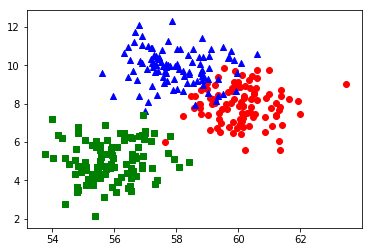

In [12]:
matplotlib.pyplot.show()

### Testing Our Model

We then generate new data points to test the accuracy of our model.

In [13]:
NUM_NEW = 10

npA_heights = numpy.random.normal(loc=PLANT_A_AVG_HEIGHT, size=NUM_NEW)
npA_widths = numpy.random.normal(loc=PLANT_A_AVG_WIDTH, size=NUM_NEW)

npB_heights = numpy.random.normal(loc=PLANT_B_AVG_HEIGHT, size=NUM_NEW)
npB_widths = numpy.random.normal(loc=PLANT_B_AVG_WIDTH, size=NUM_NEW)

npC_heights = numpy.random.normal(loc=PLANT_C_AVG_HEIGHT, size=NUM_NEW)
npC_widths = numpy.random.normal(loc=PLANT_C_AVG_WIDTH, size=NUM_NEW)

In [14]:
np_heights = list(numpy.append(list(numpy.append(npA_heights, npB_heights)), npC_heights))

In [15]:
np_widths = list(numpy.append(list(numpy.append(npA_widths, npB_widths)), npC_widths))

In [16]:
np_inputs = list(zip(np_heights, np_widths))

In [17]:
np_inputs

[(59.244658652131008, 10.24961204834225),
 (61.650798944304341, 8.6480006609093341),
 (60.131639466258676, 7.6026981050521538),
 (60.154120033591518, 8.9552894604964894),
 (59.408929856060219, 8.5429707663063184),
 (59.984059317360114, 9.0572918206138482),
 (60.060906416792804, 8.8714766763586095),
 (61.354553805658846, 8.6622974669953887),
 (60.21293237558033, 7.1663244404324971),
 (59.739269762747604, 7.7847625109436258),
 (58.829863482850698, 9.4665283844714239),
 (58.961097098361506, 10.248173828920246),
 (57.565127646886502, 8.4677352969065733),
 (58.657794650155168, 11.727313520071132),
 (56.753526039017935, 8.5743721797977717),
 (57.809851785833523, 9.7232586621617472),
 (56.825772791585976, 9.9937000711331141),
 (58.314163823670732, 11.377088098021748),
 (58.253751876680937, 10.523557746123888),
 (59.210105721165711, 10.109656742382159),
 (56.295404192864453, 6.3895334794810257),
 (56.264114400647017, 6.4810010778981244),
 (56.705097640578664, 4.073800599579589),
 (56.442356758

We then find the probably of each plant being in each group.

In [18]:
predictionA = modelA.predict_proba(np_inputs)
predictionB = modelB.predict_proba(np_inputs)
predictionC = modelC.predict_proba(np_inputs)
print(predictionA)
print(predictionB)
print(predictionC)

[[ 0.35802987  0.64197013]
 [ 0.3844182   0.6155818 ]
 [ 0.36754678  0.63245322]
 [ 0.36787258  0.63212742]
 [ 0.35971364  0.64028636]
 [ 0.36601522  0.63398478]
 [ 0.36684585  0.63315415]
 [ 0.3811178   0.6188822 ]
 [ 0.36841296  0.63158704]
 [ 0.36326592  0.63673408]
 [ 0.35350045  0.64649955]
 [ 0.35496149  0.64503851]
 [ 0.33993267  0.66006733]
 [ 0.35177777  0.64822223]
 [ 0.33140245  0.66859755]
 [ 0.34259873  0.65740127]
 [ 0.33223731  0.66776269]
 [ 0.34807069  0.65192931]
 [ 0.34737559  0.65262441]
 [ 0.35764725  0.64235275]
 [ 0.32651097  0.67348903]
 [ 0.32619158  0.67380842]
 [ 0.33064538  0.66935462]
 [ 0.32784248  0.67215752]
 [ 0.32532518  0.67467482]
 [ 0.30664265  0.69335735]
 [ 0.3277723   0.6722277 ]
 [ 0.33065215  0.66934785]
 [ 0.30834444  0.69165556]
 [ 0.33084293  0.66915707]]
[[  9.53548245e-01   4.64517550e-02]
 [  1.58150268e-01   8.41849732e-01]
 [  2.66594425e-02   9.73340557e-01]
 [  4.03652623e-01   5.96347377e-01]
 [  2.50483507e-01   7.49516493e-01]
 [  

We then assign the new data points a `marker` to represent the true value, and a color based on whichever model it's represented as closest to.

In [19]:
for x in range(0, len(np_inputs)):
    prob_A = predictionA[x][0]
    prob_B = predictionB[x][0]
    prob_C = predictionC[x][0]
    print(x)
    print(prob_A)
    print(prob_B)
    print(prob_C)
    if x < NUM_NEW:
        this_marker = "o"
    elif x < NUM_NEW*2:
        this_marker = "^"
    else:
        this_marker = "s"
    if max(prob_A, prob_B, prob_C) == prob_A:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="red", marker=this_marker)
    elif max(prob_A, prob_B, prob_C) == prob_B:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="blue", marker=this_marker)
    else:
        matplotlib.pyplot.scatter(np_inputs[x][0], np_inputs[x][1], c="green", marker=this_marker)

0
0.358029867294
0.953548245033
0.000293780859006
1
0.384418202663
0.158150268212
0.0180104281289
2
0.367546776843
0.0266594425332
0.118355767182
3
0.367872579876
0.403652622953
0.00650457909869
4
0.359713636809
0.250483507251
0.0136944343663
5
0.366015219217
0.478728854332
0.004987393942
6
0.36684585394
0.36466109301
0.00767125434951
7
0.381117802423
0.178146556028
0.0163275245486
8
0.368412964768
0.00933180631206
0.266333924131
9
0.363265920588
0.0465197628556
0.075493529989
10
0.353500453668
0.787994080317
0.0015382365088
11
0.354961493688
0.95782335312
0.000276205295639
12
0.339932671097
0.355305959412
0.0106569111429
13
0.351777767996
0.998831611768
9.42248289781e-06
14
0.331402445018
0.48916256791
0.00699731450482
15
0.342598733927
0.908786203344
0.00068635178837
16
0.332237312091
0.964575785906
0.000299309511287
17
0.348070691805
0.997635714269
1.90653554147e-05
18
0.347375593845
0.98267300329
0.000126887291546
19
0.357647252143
0.937131446214
0.000398577158527
20
0.326510970599

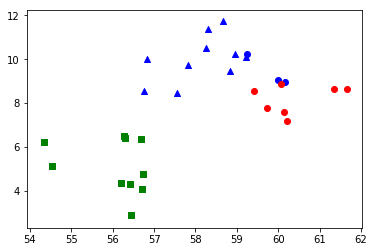

In [20]:
matplotlib.pyplot.show()